California Housing Dataset (head):
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  

Baseline Linear Regression:
Train RMSE: 0.7259055195328006
Test RMSE : 0.7219777996952081
Train R²  : 0.6053934149236341
Test R²   : 0.6068373239208651

Ridge Regression Results:
Alpha=0.01: Train RMSE=0.73, Test RMSE=0.72, Train R²=0.61, Test R²=0.61
Alpha=0.1: Train RMSE=0.73, Test RMSE=0.72, Train R²=0.61, Test R²=0.61
Alpha=1: Train 

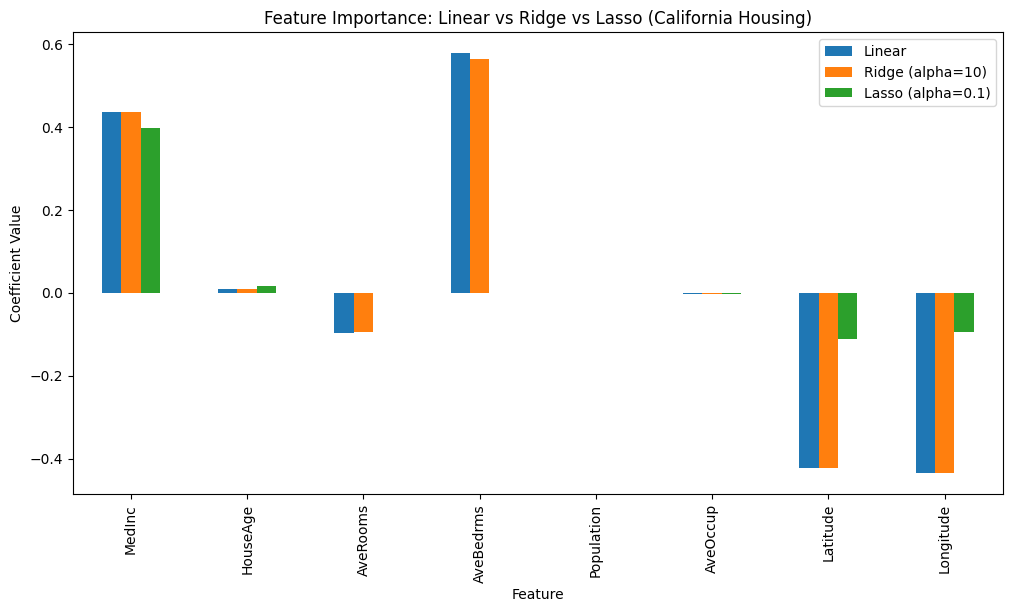

In [3]:
# ----------------------------------------
# Goal: Show how to control overfitting and feature importance
#       using Linear, Ridge, and Lasso regression
# ----------------------------------------

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import fetch_california_housing

# -----------------------------
# 1. Load California Housing dataset (Recommended)
# -----------------------------
california = fetch_california_housing(as_frame=True)

X = california.data
y = california.target
df = california.frame

print("California Housing Dataset (head):")
print(df.head())

# -----------------------------
# 2. Split into train/test
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=1
)

# Helper function
def evaluate_model(model, X_train, X_test, y_train, y_test):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)
    return rmse_train, rmse_test, r2_train, r2_test

# -----------------------------
# 3. Baseline Linear Regression
# -----------------------------
lin_reg = linear_model.LinearRegression()
lin_reg.fit(X_train, y_train)

baseline_scores = evaluate_model(lin_reg, X_train, X_test, y_train, y_test)
print("\nBaseline Linear Regression:")
print("Train RMSE:", baseline_scores[0])
print("Test RMSE :", baseline_scores[1])
print("Train R²  :", baseline_scores[2])
print("Test R²   :", baseline_scores[3])

# -----------------------------
# 4. Ridge Regression (L2 penalty)
# -----------------------------
alphas = [0.01, 0.1, 1, 10, 100]
print("\nRidge Regression Results:")
for alpha in alphas:
    ridge = linear_model.Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    scores = evaluate_model(ridge, X_train, X_test, y_train, y_test)
    print(f"Alpha={alpha}: Train RMSE={scores[0]:.2f}, Test RMSE={scores[1]:.2f}, Train R²={scores[2]:.2f}, Test R²={scores[3]:.2f}")

# -----------------------------
# 5. Lasso Regression (L1 penalty)
# -----------------------------
print("\nLasso Regression Results:")
for alpha in alphas:
    lasso = linear_model.Lasso(alpha=alpha, max_iter=10000)
    lasso.fit(X_train, y_train)
    scores = evaluate_model(lasso, X_train, X_test, y_train, y_test)
    print(f"Alpha={alpha}: Train RMSE={scores[0]:.2f}, Test RMSE={scores[1]:.2f}, Train R²={scores[2]:.2f}, Test R²={scores[3]:.2f}")

# -----------------------------
# 6. Compare Feature Importance
# -----------------------------
coef_df = pd.DataFrame({
    "Feature": X.columns,
    "Linear": lin_reg.coef_,
    "Ridge (alpha=10)": linear_model.Ridge(alpha=10).fit(X_train, y_train).coef_,
    "Lasso (alpha=0.1)": linear_model.Lasso(alpha=0.1, max_iter=10000).fit(X_train, y_train).coef_
})

print("\nFeature Coefficients Comparison:")
print(coef_df)

# Plot coefficients
coef_df.set_index("Feature").plot(kind="bar", figsize=(12,6))
plt.title("Feature Importance: Linear vs Ridge vs Lasso (California Housing)")
plt.ylabel("Coefficient Value")
plt.show()


 Step 1: Dataset loaded successfully
      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        b  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2   

 Step 2: Train-Test split done

 Step 3: Linear Regression complete
Linear Regression Results:
 Train RMSE: 4.6520331848801675
 Test RMSE : 4.928602182665339
 R² Train : 0.7508856358979673
 R² Test  : 0.6687594935356317

 Step 4: Ridge Regression complete
Ridge Regression Results (Test Data):
 alpha=0.1   | RMSE=4.930 | R²=0.669

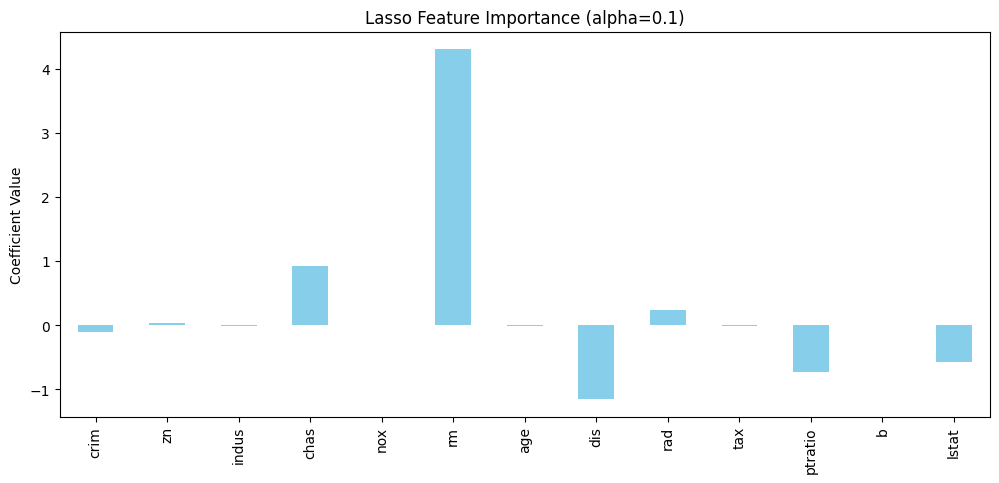

 Step 6: Lasso Feature Importance plotted



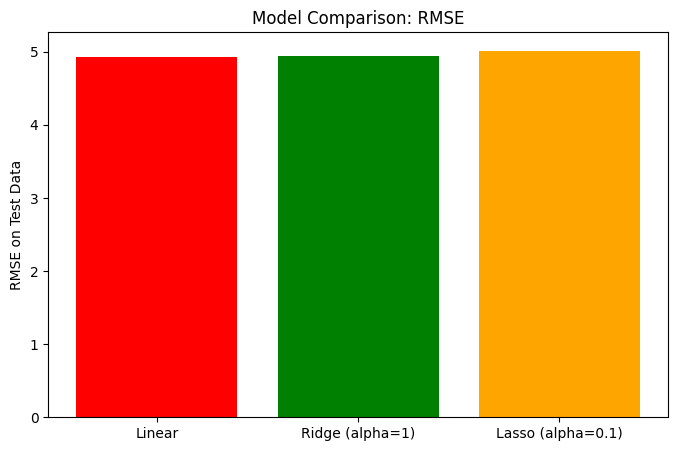

 Step 7: RMSE comparison plotted


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
# Step 1: Load Boston Housing dataset
# -------------------------
url = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"
df = pd.read_csv(url)

# Features (X) and Target (y)
X = df.drop("medv", axis=1)
y = df["medv"]

print(" Step 1: Dataset loaded successfully")
print(df.head(), "\n")

# -------------------------
# Step 2: Train/Test split
# -------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print(" Step 2: Train-Test split done\n")

# -------------------------
# Step 3: Linear Regression
# -------------------------
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

y_train_pred = lin_reg.predict(X_train)
y_test_pred = lin_reg.predict(X_test)

print(" Step 3: Linear Regression complete")
print("Linear Regression Results:")
print(" Train RMSE:", np.sqrt(mean_squared_error(y_train, y_train_pred)))
print(" Test RMSE :", np.sqrt(mean_squared_error(y_test, y_test_pred)))
print(" R² Train :", r2_score(y_train, y_train_pred))
print(" R² Test  :", r2_score(y_test, y_test_pred))
print()

# Step 4: Ridge Regression (L2 penalty)
# -------------------------
alphas_ridge = [0.1, 1, 10, 100]
ridge_results = {}

for alpha in alphas_ridge:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    
    y_pred = ridge.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    
    ridge_results[alpha] = (rmse, r2)

print(" Step 4: Ridge Regression complete")
print("Ridge Regression Results (Test Data):")
for alpha, (rmse, r2) in ridge_results.items():
    print(f" alpha={alpha:<5} | RMSE={rmse:.3f} | R²={r2:.3f}")
print()

# -------------------------
# Step 5: Lasso Regression (L1 penalty)
# -------------------------
alphas_lasso = [0.01, 0.1, 1, 10]
lasso_results = {}

for alpha in alphas_lasso:
    lasso = Lasso(alpha=alpha, max_iter=10000)
    lasso.fit(X_train, y_train)
    
    y_pred = lasso.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    
    lasso_results[alpha] = (rmse, r2, lasso.coef_)

print(" Step 5: Lasso Regression complete")
print("Lasso Regression Results (Test Data):")
for alpha, (rmse, r2, coefs) in lasso_results.items():
    print(f" alpha={alpha:<5} | RMSE={rmse:.3f} | R²={r2:.3f} | Non-zero features={np.sum(coefs!=0)}")
print()

# -------------------------
# Step 6: Plot Feature Importance for Lasso (best alpha)
best_alpha = 0.1
lasso = Lasso(alpha=best_alpha, max_iter=10000)
lasso.fit(X_train, y_train)

coef = pd.Series(lasso.coef_, index=X.columns)

plt.figure(figsize=(12,5))
coef.plot(kind="bar", color='skyblue')
plt.title(f"Lasso Feature Importance (alpha={best_alpha})")
plt.ylabel("Coefficient Value")
plt.show()
print(" Step 6: Lasso Feature Importance plotted\n")

# Step 7: Compare RMSE across models
# Prepare RMSE data
rmse_data = {
    "Linear": np.sqrt(mean_squared_error(y_test, y_test_pred)),
    "Ridge (alpha=1)": ridge_results[1][0],
    "Lasso (alpha=0.1)": lasso_results[0.1][0]
}

plt.figure(figsize=(8,5))
plt.bar(rmse_data.keys(), rmse_data.values(), color=['red','green','orange'])
plt.ylabel("RMSE on Test Data")
plt.title("Model Comparison: RMSE")
plt.show()
print(" Step 7: RMSE comparison plotted")